<a href="https://colab.research.google.com/github/xmpuspus/Lectures/blob/master/notebooks/IntroNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis  

Graphs are mathematical structures used to study pairwise relationships between objects and entities. It is a branch of Discrete Mathematics and has found multiple applications in Computer Science, Chemistry, Linguistics, Operations Research, Sociology etc.  

Reference: [link](https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/)

This notebook shows how to trace the path from one airport to another given flight schedules.

### Import Packages

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


### Load Data

Our data is about flights to and from airports. 

In [0]:
data = pd.read_csv('routes.csv')
data.head()

,airline,airline ID,source airport,source airport id,destination apirport,destination airport id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [0]:
data.columns

Index(['airline', 'airline ID', ' source airport', ' source airport id',
       ' destination apirport', ' destination airport id', ' codeshare',
       ' stops', ' equipment'],
      dtype='object')

### Construct Network

In [0]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source=' source airport', target=' destination apirport', edge_attr=True,)

FG_sample = nx.from_pandas_edgelist(data[:100], source=' source airport', target=' destination apirport', edge_attr=True,)

### List of Nodes

In [0]:
FG.nodes()

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'OVB', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'LED', 'SVX', 'NJC', 'NUX', 'BTK', 'IKT', 'HTA', 'KCK', 'ODO', 'UKX', 'ULK', 'YKS', 'MJZ', 'AYP', 'LIM', 'CUZ', 'PEM', 'HUU', 'IQT', 'PCL', 'TPP', 'ABJ', 'BOY', 'OUA', 'ACC', 'BKO', 'DKR', 'COO', 'LFW', 'NIM', 'BOG', 'GYE', 'UIO', 'CLO', 'SCY', 'OCC', 'BDS', 'ZRH', 'BOD', 'BRS', 'GVA', 'LPA', 'LCA', 'RMF', 'TFS', 'AJR', 'LYC', 'ARN', 'GEV', 'HAD', 'JKG', 'KRF', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VBY', 'VHM', 'VXO', 'HMV', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KOZ', 'OLH', 'KZB', 'SYB', 'KYK', 'ORI', 'KPR', 'BSO', 'MNL', 'BXU', 'CBO', 'CGY', 'CRM', 'DGT', 'DWC', 'GES', 'KLO', 'LGP', 'MPH', 'OZC', 'PPS', 'RXS', 'SUG', 'TUG', 'ZAM', 'AUX', 'PMW', 'BRA', 'BSB', 'SSA', 'OPS', 'RAO', 'CAC', 'GRU', 'CGB', 'GYN', 'CGR', 'DOU', 'GIG', 'UBA', 'UDI', 'VDC', 'PLU', 'SJP', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTN', 'KTB', 'MTM', 'LOS', 'ROB', 'BCN', 'BJL', 'FNA', 'CKY', 'OX

### List of Edges

In [0]:
FG.edges()

EdgeView([('AER', 'KZN'), ('AER', 'DYU'), ('AER', 'KIV'), ('AER', 'MSQ'), ('AER', 'TAS'), ('AER', 'TZX'), ('AER', 'EVN'), ('AER', 'KRR'), ('AER', 'DME'), ('AER', 'IST'), ('AER', 'LED'), ('AER', 'OMS'), ('AER', 'SVO'), ('AER', 'SVX'), ('AER', 'LBD'), ('AER', 'VKO'), ('AER', 'KJA'), ('AER', 'NSK'), ('KZN', 'ASF'), ('KZN', 'CEK'), ('KZN', 'DME'), ('KZN', 'EGO'), ('KZN', 'LED'), ('KZN', 'SVX'), ('KZN', 'AYT'), ('KZN', 'DWC'), ('KZN', 'SHJ'), ('KZN', 'FEG'), ('KZN', 'SKD'), ('KZN', 'TAS'), ('KZN', 'ALA'), ('KZN', 'SVO'), ('KZN', 'DYU'), ('KZN', 'LBD'), ('KZN', 'IST'), ('KZN', 'UFA'), ('KZN', 'FRU'), ('KZN', 'OSS'), ('ASF', 'MRV'), ('ASF', 'DME'), ('ASF', 'LED'), ('ASF', 'SCO'), ('ASF', 'SVO'), ('ASF', 'SAW'), ('MRV', 'RTW'), ('MRV', 'SAW'), ('MRV', 'SCO'), ('MRV', 'DXB'), ('MRV', 'TAS'), ('MRV', 'GYD'), ('MRV', 'TLV'), ('MRV', 'DME'), ('MRV', 'EVN'), ('MRV', 'LED'), ('MRV', 'SVO'), ('MRV', 'SVX'), ('MRV', 'DWC'), ('MRV', 'DYU'), ('MRV', 'VKO'), ('CEK', 'OVB'), ('CEK', 'PRG'), ('CEK', 'FRU')

### Draw network

CPU times: user 68.5 ms, sys: 15.9 ms, total: 84.3 ms
Wall time: 107 ms


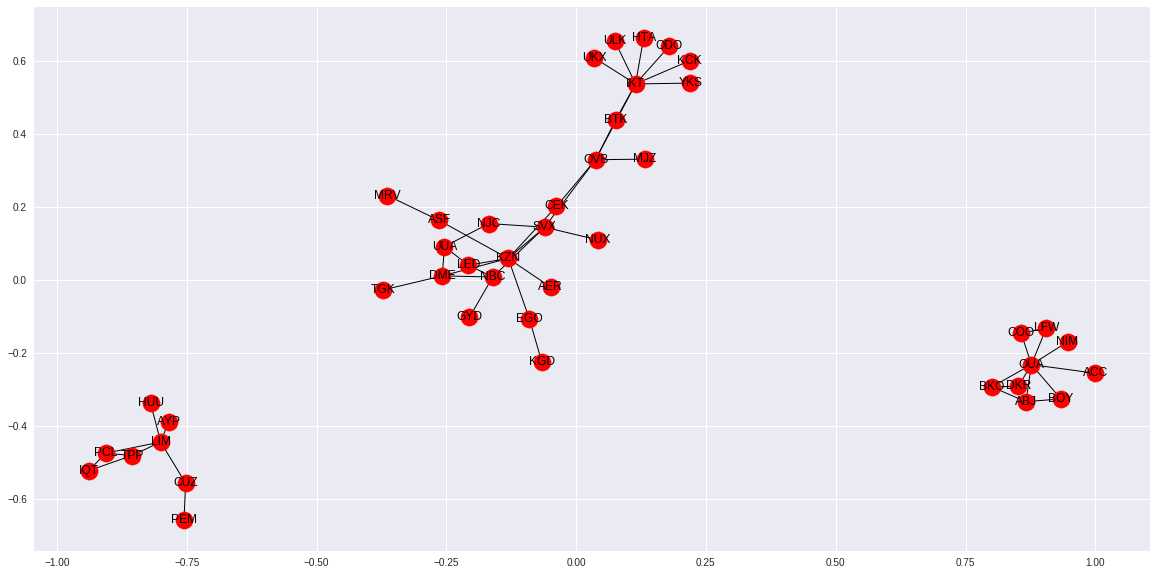

In [0]:
%%time
plt.figure(figsize = (20, 10))
nx.draw_networkx(FG_sample, with_labels=True)

## Example 1:

### Find All Paths from Los Angeles, California to Washington D.C.

In [0]:
n = 0
for path in nx.all_simple_paths(FG, source='LAX', target='IAD'):
  print(path)
  if n == 2:
    break
  else:
    n += 1

['LAX', 'LAS', 'MTY', 'CUN', 'MEX', 'ACA', 'TLC', 'PVR', 'DFW', 'EZE', 'JFK', 'MSY', 'DTW', 'CLT', 'CUR', 'BON', 'AUA', 'LSP', 'CCS', 'BLA', 'MIA', 'PUJ', 'PHL', 'ATH', 'CGN', 'NDR', 'AMS', 'TNG', 'BCN', 'BJL', 'DKR', 'BKO', 'ABJ', 'BOY', 'OUA', 'ACC', 'LOS', 'DLA', 'BRU', 'CMN', 'BGY', 'TIA', 'BLQ', 'TXL', 'FDH', 'DUS', 'AOI', 'FCO', 'HAJ', 'CTA', 'HAM', 'ARN', 'GEV', 'LLA', 'SDL', 'BMA', 'GOT', 'LYS', 'BES', 'NCE', 'TLV', 'CAI', 'BEN', 'AKF', 'TIP', 'AMM', 'ORD', 'BRL', 'STL', 'OWB', 'SFB', 'KEF', 'HEL', 'LHR', 'STR', 'AGP', 'MUC', 'EBA', 'ACH', 'VIE', 'HER', 'BOD', 'ZRH', 'BDS', 'LIN', 'CDG', 'IST', 'DYU', 'AER', 'KZN', 'ASF', 'MRV', 'RTW', 'DME', 'NBC', 'GYD', 'MXP', 'KIV', 'BVA', 'ACE', 'FUE', 'LEJ', 'AYT', 'SVO', 'ARH', 'LED', 'UUA', 'NJC', 'SVX', 'NUX', 'TJM', 'TAS', 'RIX', 'TFS', 'GVA', 'LPA', 'MAD', 'BOS', 'ACK', 'EWB', 'HPN', 'DCA', 'AGS', 'ATL', 'LWB', 'IAD']
['LAX', 'LAS', 'MTY', 'CUN', 'MEX', 'ACA', 'TLC', 'PVR', 'DFW', 'EZE', 'JFK', 'MSY', 'DTW', 'CLT', 'CUR', 'BON', 'AUA

### Find the Shortest Path from Los Angeles, California to Washington D.C.

In [0]:
dijpath = nx.dijkstra_path(FG, source='LAX', target='IAD')
dijpath

['LAX', 'IAD']

## Example 2:

### Find All Paths from Washington D.C. to Italy

In [0]:
for path in nx.all_simple_paths(FG, source='IAD', target='BGY'):
  print (path)
  break

['IAD', 'AUH', 'AMD', 'BLR', 'BBI', 'BOM', 'BDQ', 'DEL', 'HEA', 'ISB', 'KBL', 'DXB', 'JIB', 'JED', 'DAC', 'BKK', 'SIN', 'DRW', 'BNE', 'ADL', 'SYD', 'CKG', 'CAN', 'CTU', 'CGO', 'CGQ', 'NKG', 'DYG', 'PVG', 'SPN', 'NRT', 'MNL', 'BXU', 'CEB', 'BCD', 'CGY', 'DVO', 'ILO', 'HKG', 'YIH', 'KMG', 'CSX', 'FOC', 'XIY', 'BHY', 'HGH', 'DLC', 'HRB', 'CZX', 'XMN', 'KOW', 'PEK', 'WXN', 'SZX', 'LJG', 'MIG', 'SYX', 'KWE', 'JJN', 'WUH', 'NNG', 'SGN', 'RMQ', 'HAN', 'CDG', 'HAM', 'FDH', 'DUS', 'AOI', 'TXL', 'AGP', 'STR', 'ATH', 'CGN', 'NDR', 'AMS', 'TNG', 'BCN', 'BJL', 'DKR', 'BKO', 'ABJ', 'BOY', 'OUA', 'ACC', 'LOS', 'DLA', 'BRU', 'CMN', 'BGY']


### Find the Shortest Path from Washington D.C. To Italy

In [0]:
dijpath = nx.dijkstra_path(FG, source='IAD', target='BGY')
dijpath

['IAD', 'DUB', 'BGY']

## Example 3:

### Find All Paths from the Philippines to Italy

In [0]:
n = 0
for path in nx.all_simple_paths(FG, source='MNL', target='BGY'):
  print (path)
  if n == 15:
    break
  else:
    n += 1


['MNL', 'BXU', 'CEB', 'BCD', 'CGY', 'DVO', 'ILO', 'HKG', 'SIN', 'BKK', 'DAC', 'CCU', 'CGP', 'MCT', 'BOM', 'AMD', 'BLR', 'BBI', 'DEL', 'HEA', 'ISB', 'KBL', 'DXB', 'JIB', 'JED', 'BEN', 'AKF', 'TIP', 'AMM', 'JFK', 'EZE', 'DFW', 'ABQ', 'LAX', 'LAS', 'MTY', 'CUN', 'MEX', 'ACA', 'TLC', 'PVR', 'ORD', 'BRL', 'STL', 'OWB', 'SFB', 'KEF', 'HEL', 'TXL', 'FDH', 'DUS', 'AOI', 'FCO', 'CGN', 'NDR', 'AMS', 'TNG', 'BCN', 'BJL', 'DKR', 'BKO', 'ABJ', 'BOY', 'OUA', 'ACC', 'LOS', 'DLA', 'BRU', 'CMN', 'BGY']
['MNL', 'BXU', 'CEB', 'BCD', 'CGY', 'DVO', 'ILO', 'HKG', 'SIN', 'BKK', 'DAC', 'CCU', 'CGP', 'MCT', 'BOM', 'AMD', 'BLR', 'BBI', 'DEL', 'HEA', 'ISB', 'KBL', 'DXB', 'JIB', 'JED', 'BEN', 'AKF', 'TIP', 'AMM', 'JFK', 'EZE', 'DFW', 'ABQ', 'LAX', 'LAS', 'MTY', 'CUN', 'MEX', 'ACA', 'TLC', 'PVR', 'ORD', 'BRL', 'STL', 'OWB', 'SFB', 'KEF', 'HEL', 'TXL', 'FDH', 'DUS', 'AOI', 'FCO', 'CGN', 'NDR', 'AMS', 'TNG', 'BCN', 'BJL', 'DKR', 'BKO', 'ABJ', 'BOY', 'OUA', 'ACC', 'LOS', 'DLA', 'BRU', 'CMN', 'BLQ', 'KIV', 'AER', 'KZN

### Find the Shortest Path From Philippines to Italy

In [0]:
dijpath = nx.dijkstra_path(FG, source='MNL', target='BGY')
dijpath

['MNL', 'DWC', 'IEV', 'BGY']

MANILA - DUBAI - UKRAINE - ITALY